In [2]:
# import packages we need for analysis
import pandas as pd
import sqlalchemy
import matplotlib.pyplot as plt
import seaborn as sns
import os
import psycopg2
sns.set()

In [3]:
# create connection to database
# DATABASE_URL = os.environ['EventRegist']

# conn = psycopg2.connect(EventRegist, sslmode='require')
engine = sqlalchemy.create_engine(
    sqlalchemy.engine.url.URL(
        drivername="postgresql",
        username="lyxftvtehiepnb",
        password="ff7e72d3218db41286c30887447b7e792a2ab9054367cfe8ab8211d391d95556",
        host="ec2-52-21-252-142.compute-1.amazonaws.com",
        port="5432",
        database="d9u8en0ugn46bj",
    ))

In [8]:
# what tables do we have in this database
engine.table_names()

['d9u8en0ugn46bj', 'student_ID__pairs', 'student_regist']

* table 2 => 'student_id_pairs'

* to make this: add a new class in the models.py file with the attributes you would like to create (e.g. student name, student ID). When a new user signs up, we can push the data to that table. 
    - You can access the data by loading the engine connected to the database EventRegist.db, but then pull that specific table
    - SELECT * FROM STUDENT_ID_PAIRS
    
    
* You can use this second table to verify data input
    - say we know that user id = 1000 exists in our system, but say someone has a typo and types 1001. 
    - we know this is a mistake and can filter post hoc, BUT can also push an error message to the user to let them know about the error
    

* polish sign up buttons and navbar
    - first step: let's identify everything we want to update.

In [12]:
# grab all data for now, we can filter in python
sql = \
"""
SELECT * 
FROM student_regist
"""

df = pd.read_sql(sql=sql, con=engine)

In [13]:
df.head()

,id,name,subteam,email,grad_year,stud_ID


For now, assume all data was validated. We should come back and validate with the second table (to be created) STUDENT_ID_PAIRS

In [10]:
df[['stud_ID','hours']].groupby('stud_ID').sum()

,hours
stud_ID,
123456,4.0
502799,6.0


Quick pivot table with total number of hours each student worked

In [11]:
# threshold number of hours for successful criteria
threshold = 25.0

# calculate total number of hours each person volunteered
gb = df[['name','hours']].groupby('name').sum().reset_index()

# label each student as meets / does not meet based on threshold
meets = []
for row in gb['hours']:
    if row > threshold:
        meets.append('Meets')
    else:
        meets.append('Does Not Meet')
        
gb['meets_requirements'] = meets

counts = gb['meets_requirements'].value_counts().sort_index()

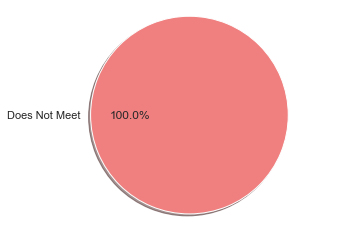

In [12]:
# https://medium.com/@krishnakummar/donut-chart-with-python-matplotlib-d411033c960b

# The slices will be ordered and plotted counter-clockwise.
labels = counts.index.tolist()
sizes = counts.values.tolist()
colors = ['lightcoral', 'yellowgreen']
explode = (0,0)  # explode a slice if required

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
        
# #draw a circle at the center of pie to make it look like a donut
# centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()  

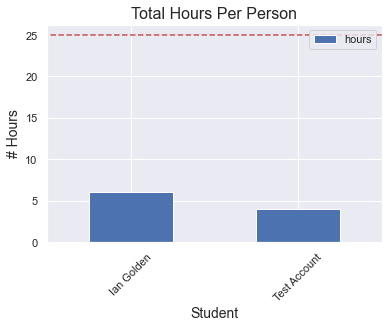

In [13]:
gb = df[['name', 'hours']].groupby('name').sum()
gb.plot.bar()

plt.hlines(25, xmin=-1, xmax=len(gb),color='r',ls='--')
plt.title('Total Hours Per Person', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Student', fontsize=14);
plt.ylabel('# Hours', fontsize=14);

## Question: can we add more interactivity to our graphs?
* Yes - with plotly, let's explore more futher

In [14]:
import plotly.express as px

In [15]:
gb.reset_index(inplace=True)

In [16]:
gb

,name,hours
0,Ian Golden,6.0
1,Test Account,4.0


In [18]:
px.bar(gb, x='name', y='hours')

## Pseudo code: can we output the student names instead of student IDs?
* this will help mentors quickly see who meets / does not meet criteriea.

__Process__:
* get a list (or any kind of storage) or IDs that meet your criteria
    - ex append student ids to a list if they do not pass threshold requirements

* query your STUDENT_ID_PAIRS table for each id
    student_id = 2 # grab this from the list previously
    sql = \
    f"""
    SELECT *
    FROM STUDENT_ID_PAIRS 
    WHERE STUD_ID = {student_id}
    """

    pd.read_sql(sql=sql, con=engine)
    
    - this dataframe will now have the pairs

In [25]:
for row in range(0,gb.shape[0]):
    if gb['hours'][row] > threshold:
        print(gb.index[row])
        
        
for row in range(0,gb.shape[0]):
    if gb['hours'][row] < threshold:
        print(str(gb['name'][row]), 'needs ', str(threshold-gb['hours'][row]), 'more hours')
        

Ian Golden needs  19.0 more hours
Test Account needs  21.0 more hours


## Event Graphs

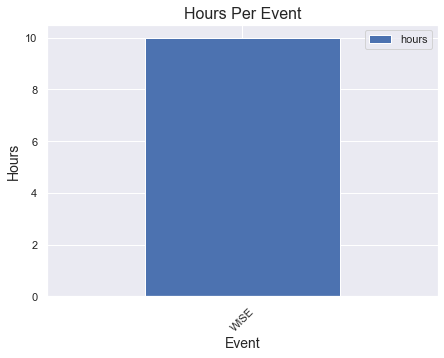

In [84]:
df[['event','hours']].groupby('event').sum().plot.bar(figsize=(7,5));
plt.title('Hours Per Event', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Hours', fontsize=14);
plt.xlabel('Event', fontsize=14);